In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [167]:
PATH = "./measurements/full-x4"

In [168]:
fechas=['2021-11-03_17-49-11','2021-11-05_16-07-41','2021-11-05_18-09-50']
data=[]

for i in fechas:
    data.append(pd.read_csv(f"{PATH}/{i}/figuras/area_{i}.csv"))

In [170]:
#OBSERVACIONES EN EL TIEMPO: x, por el eje
#1/4 porque son 4 mediciones en un día, así queda en función de los días
dt=1/4
x_1= np.arange(0,len(data[0]["# nro"])/4,dt) #Primera medición desde el 03/11 hasta el 05/11; son 7 mediciones
x_2= np.array([x_1[-1] + dt]) #medición del 05/11 a las 16hs, única medición
x_3= x_2 + np.arange(dt,len(data[2]["# nro"])/4+dt,dt) #continuación de las mediciones, desde 05/11 a las 18hs hasta 08/11 mediodía, total 11 mediciones
#x_4 NO CONTAR LA MEDICION DEL 08/11 AL MEDIODIA

args=(x_1,x_2,x_3)
x=np.concatenate(args)

In [171]:
#AREAS
area1=[]
area2=[]
area3=[]
area4=[]

for i in range(len(fechas)):
    area1.append(np.array(data[i]['Area1']))
    area2.append(np.array(data[i]['Area2']))
    area3.append(np.array(data[i]['Area3']))
    area4.append(np.array(data[i]['Area4']))

area1=np.concatenate(area1)
area2=np.concatenate(area2)
area3=np.concatenate(area3)
area4=np.concatenate(area4)

La fórmula es 
g= $\frac{F CT 44 g/mol}{22414 . 10^6 0.001L/mol}$

Con F el flujo (1.5L/min), CT el área bajo la curva en MINUTOS, como lo tenemos en segundos:

g= $\frac{F* CT/60 * 44 g/mol}{22414 . 10^6 0.001L/mol}$

In [172]:
F = 1.5
den = 22414 * 0.001 * 10 ** 6

def gramos(x): #meter el área
    return F * x * 44 / (den * 60)

In [173]:
gramos1=np.array(gramos(area1))
gramos2=np.array(gramos(area2))
gramos3=np.array(gramos(area3))
gramos4=np.array(gramos(area4))


In [174]:
#Los ordeno de manera acumulada
gramos1_ac=[gramos1[0]]
gramos2_ac=[gramos2[0]]
gramos3_ac=[gramos3[0]]
gramos4_ac=[gramos4[0]]


for i in range(len(gramos1)-1):
    gramos1_ac.append(gramos1_ac[i]+gramos1[i+1])
    gramos2_ac.append(gramos2_ac[i]+gramos2[i+1])
    gramos3_ac.append(gramos3_ac[i]+gramos3[i+1])
    gramos4_ac.append(gramos4_ac[i]+gramos4[i+1])

Cada área tomada fue de 25 minutos, por tanto, hacemos regla de 3 simples para comparar con el de titulacion (5.5h)

25 min ---- area

5.5h=330min ----

se debe multiplicar al eje Y por 330/25=13.2 ¿¿¿???

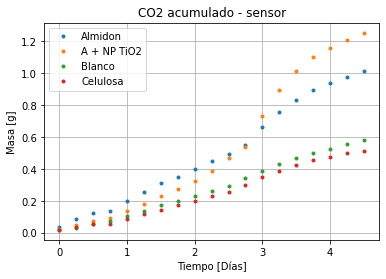

In [177]:
plt.plot(x,gramos1_ac,'.',label='Almidon')
plt.plot(x,gramos3_ac,'.',label='A + NP TiO2')
plt.plot(x,gramos4_ac,'.',label='Blanco')
plt.plot(x,gramos2_ac,'.',label='Celulosa')
plt.legend()
plt.title('CO2 acumulado - sensor')
plt.xlabel('Tiempo [Días]')
plt.ylabel('Masa [g]')
plt.grid(True)
plt.savefig("co2_acumulado-sensor.png")
plt.show()